In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## Reading Data from file

In [2]:
file_path= "E:\Data Analysis project jupyter lab\EDA Data Analysis Project\Hotel Bookig Analysis\Hotel Bookings.csv"
df= pd.read_csv(file_path)
df.tail(5)

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

## Create a copy of dataset

In [3]:
df1=df.copy()

In [4]:
df['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

## Data Cleaning

In [5]:
df1.duplicated().value_counts()    #count duplicate rows

False    87396
True     31994
dtype: int64

In [6]:
df1= df1.drop_duplicates()

In [7]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0             company        82137
1               agent        12193
2             country          452
3            children            4
4  reserved_room_type            0
5  assigned_room_type            0

In [8]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)

In [9]:
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0                        hotel            0
1                  is_canceled            0
2           reservation_status            0
3    total_of_special_requests            0
4  required_car_parking_spaces            0
5                          adr            0

In [10]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

len(df1[df1['adults']+df1['babies']+df1['children']==0 ])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [11]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

# EDA (Exploratory Data Analysis) 

## Univariate Analysis

## 1) Which type of hotel is mostly prefered by the guests?


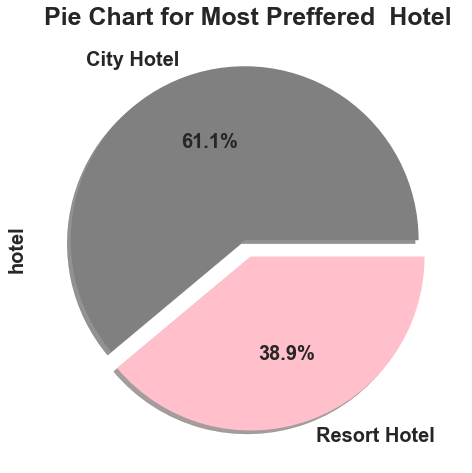

In [12]:
# Visualizsing the by pie chart.
data = df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20, colors = ['grey', 'pink'])   
plt.title('Pie Chart for Most Preffered  Hotel')
plt.show()

### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

## 2) Which Agent made the most bookings?


In [13]:
# highest bookings made by agents
highest_bookings = df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns = {'count': 'Most_Bookings'}).sort_values(by='Most_Bookings',ascending=False)

# as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']== 0].index, inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings = highest_bookings[:10]
top_ten_highest_bookings

agent  Most_Bookings
9      9.0          28721
174  240.0          13028
14    14.0           3342
7      7.0           3294
183  250.0           2779
175  241.0           1644
27    28.0           1493
8      8.0           1383
1      1.0           1228
6      6.0           1117

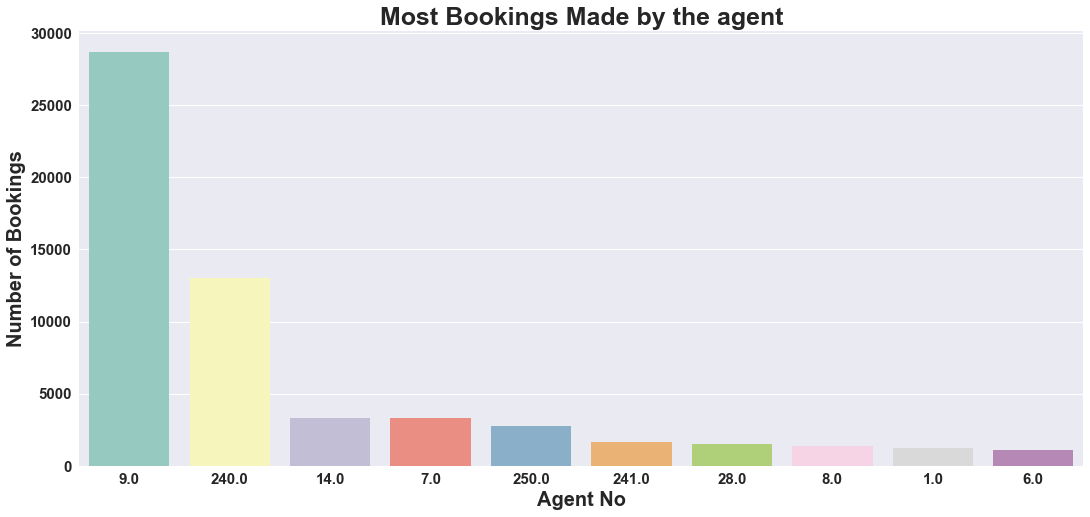

In [14]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'], palette='Set3')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")
plt.show()

### Agent ID no: 9 made most of the bookings


## 3) What is the pecentage of booking cancellation?


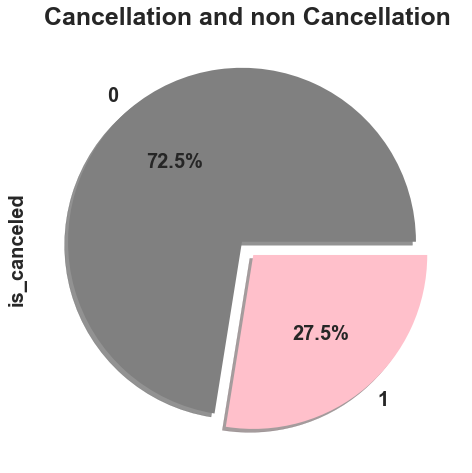

In [15]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20, colors = ['grey', 'pink'])   
plt.title("Cancellation and non Cancellation")
plt.show()

### 0 = not cancled,  1 = canceled
### 27.5 % of the bookings were cancelled.

## 4) What is the Percentage of repeated guests?

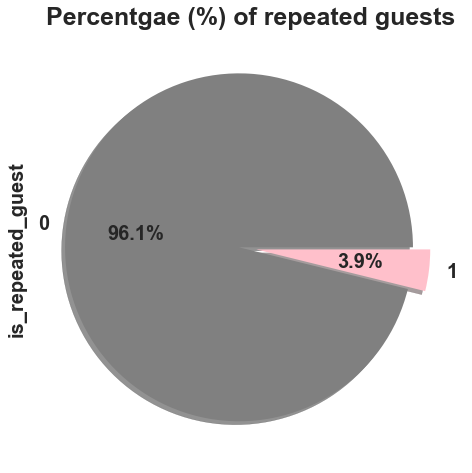

In [16]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20, colors = ['grey', 'pink']) 
plt.title(" Percentgae (%) of repeated guests")
plt.show()

### Repeated guests are very few which only 3.9 %.
### In order to retained the guests management should take thier feedbacks and imporve the services.

## 5) What is the percentage distribution of "Customer Type"?


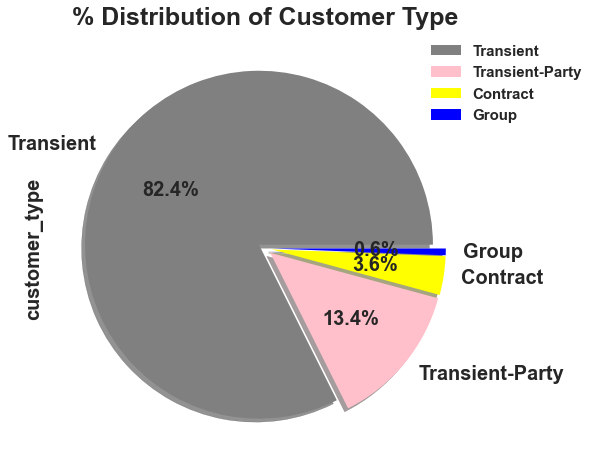

In [17]:
df1['customer_type'].value_counts().plot.pie(explode=[0.04]*4, autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20, colors = ['grey', 'pink', 'yellow', 'blue']) 

labels=df1['customer_type'].value_counts().index.tolist()
plt.title("% Distribution of Customer Type")

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.show()

### 1. Contract

when the booking has an allotment or other type of contract associated to it

### 2. Group

when the booking is associated to a group

### 3. Transient

when the booking is not part of a group or contract, and is not associated to other transient booking

### 4. Transient-party

when the booking is transient, but is associated to at least other transient booking

### Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low, so specical discounts should be offere to Group type customer to increase thier bookings

## 6)What is the percentage distribution of required_car_parking_spaces?


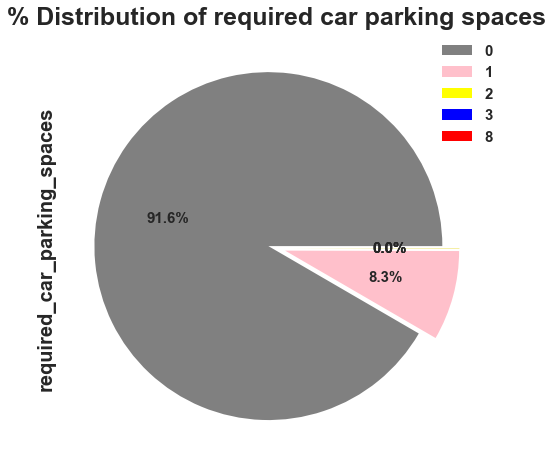

In [18]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None, colors = ['grey', 'pink', 'yellow', 'blue', 'red'])

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

## 7)What is the percentage of booking changes made by the customer.?

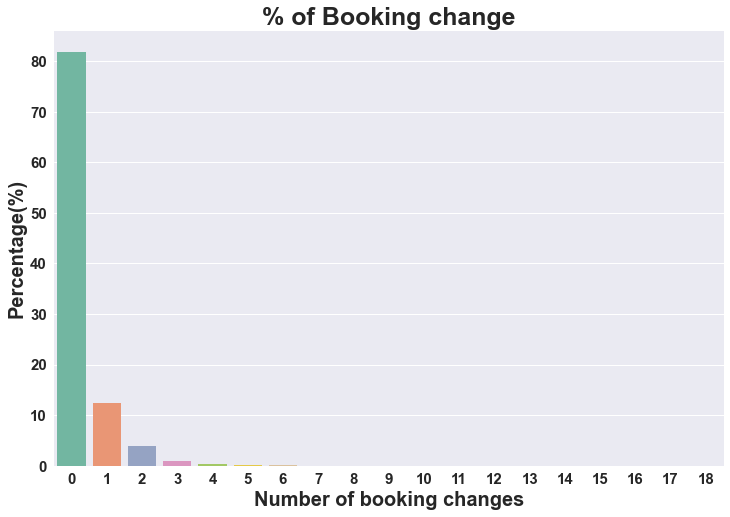

In [19]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0], palette = 'Set2')
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')
plt.show()

 0= 0 changes made in the booking, 1= 1 changes made in the booking, 2= 2 changes made in the booking

### Almost 82% of the bookings were not changed by guests.


## 8)What is Percentage distribution of Deposite type ?


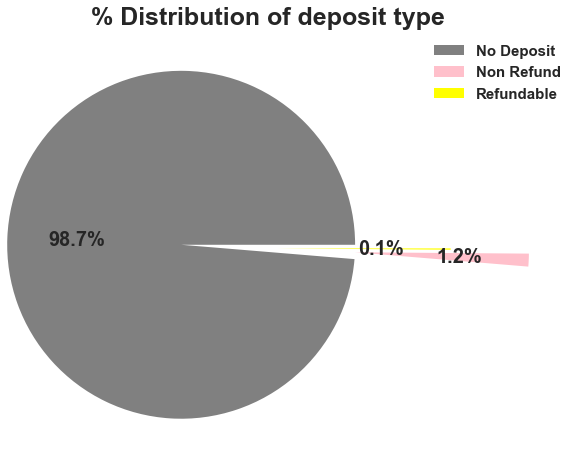

In [20]:
df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None, colors = ['grey', 'pink', 'yellow'])
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

###  98.7 % of the guests prefer "No deposit" type of deposit.

## 9) Which type of food is mostly preferred by the guests?


Text(0.5, 1.0, 'Preferred Meal Type')

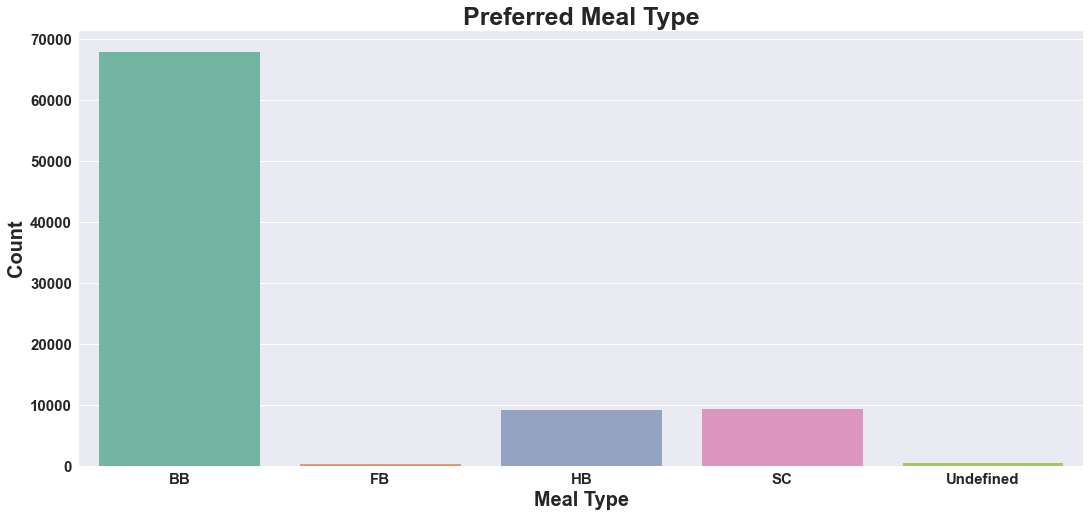

In [21]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'], palette = 'Set2')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)
HB- (Half Board)
FB- (Full Board)
SC- (Self Catering) 

### So the most preferred meal type by the guests is BB( Bed and Breakfast) ### HB- (Half Board) and SC- (Self Catering) are equally preferred.

## 10) From which country the most guests are coming?
 

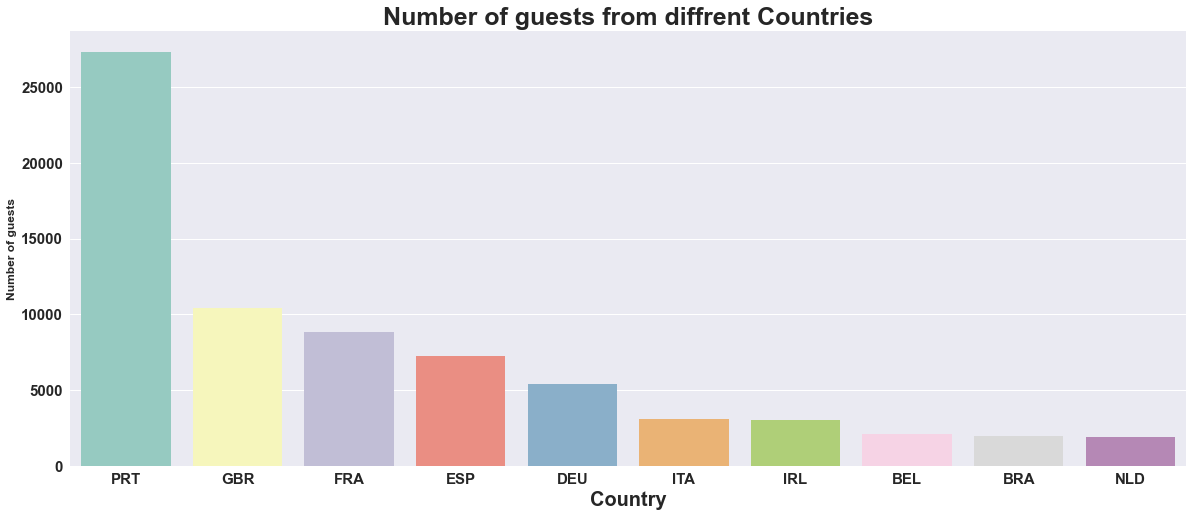

In [22]:
# Counting the guests from various countries.

country_df=df1['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country':'count of guests'})[:10]

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'], palette='Set3')
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")
plt.show()

### Most of the guests are coming from portugal i.e more 25000 guests are from portugal

###### PRT- Portugal
###### GBR- United Kingdom
###### FRA- France
###### ESP- Spain
###### DEU - Germany
###### ITA -Itlay
###### IRL - Ireland
###### BEL -Belgium
###### BRA -Brazil
###### NLD-Netherlands

## 11) Which is the most preferred room type by the customers?


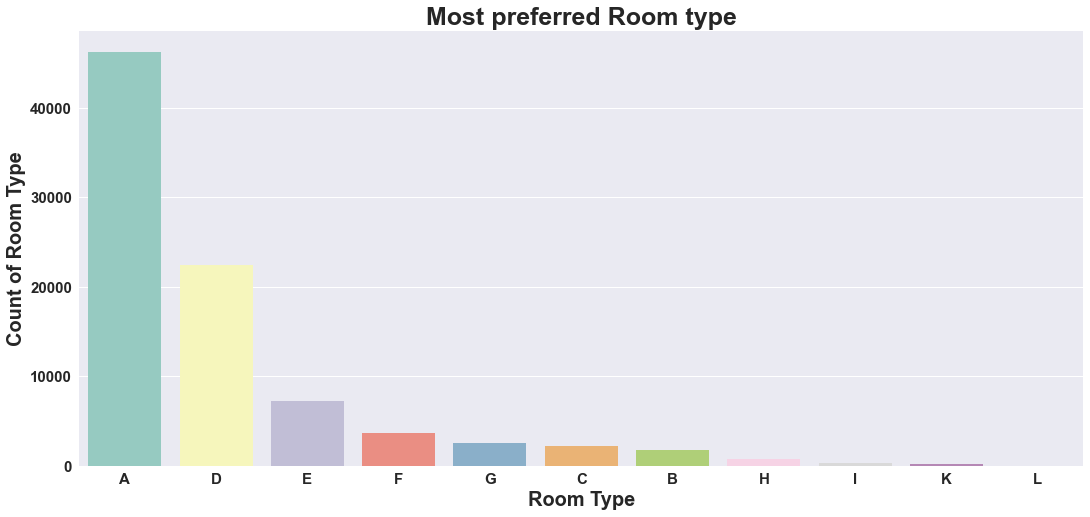

In [23]:
plt.figure(figsize=(18,8))

sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index, palette='Set3')
plt.xlabel('Room Type')
plt.ylabel('Count of Room Type')
plt.title("Most preferred Room type")
plt.show()

### So the most preferred Room type is "A".

## 12)In which month most of the bookings happened?


In [24]:
# groupby arrival_date_month and taking the hotel count
bookings_by_month_df =df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# creating df which will map the order of above months list without changing its values.
bookings_by_month_df['arrival_date_month'] = pd.Categorical(bookings_by_month_df['arrival_date_month'], categories=months, ordered=True)

# sorting by arrival_date_month
bookings_by_month_df=bookings_by_month_df.sort_values('arrival_date_month')

bookings_by_month_df

arrival_date_month  Counts
4             January    4685
3            February    6083
7               March    7489
0               April    7900
8                 May    8344
6                June    7756
5                July   10043
1              August   11242
11          September    6682
10            October    6921
9            November    4973
2            December    5112

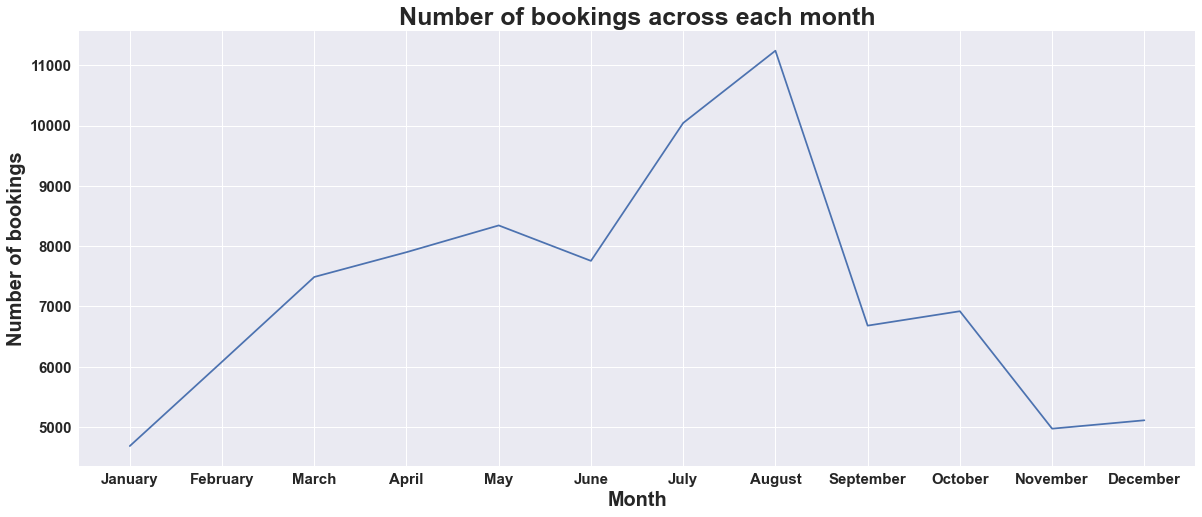

In [25]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_month_df['arrival_date_month'],y=bookings_by_month_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')
plt.show()

### July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.



## 13) Which Distribution channel is mostly used for hotel bookings?


In [26]:
import plotly.express as px
df2 = pd.DataFrame()


Total_counts_distribution_channel=df1['distribution_channel'].value_counts()

df2['unique_distribution_channel'] = df1['distribution_channel'].unique()
percnt= (100. * Total_counts_distribution_channel / Total_counts_distribution_channel.sum()).round(1).tolist()

df2['prcnt_of_distribution_channel_values'] =percnt
fig = px.bar(df2, x='unique_distribution_channel', y='prcnt_of_distribution_channel_values')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1, 2, 3, 4, 5],
        ticktext = ['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined']
    )
)
fig.show()

### 'TA/TO' is mostly(79.1%) used for booking hoetls.


## 14) Which year had the highest bookings?


Text(0.5, 1.0, 'Year Wise bookings')

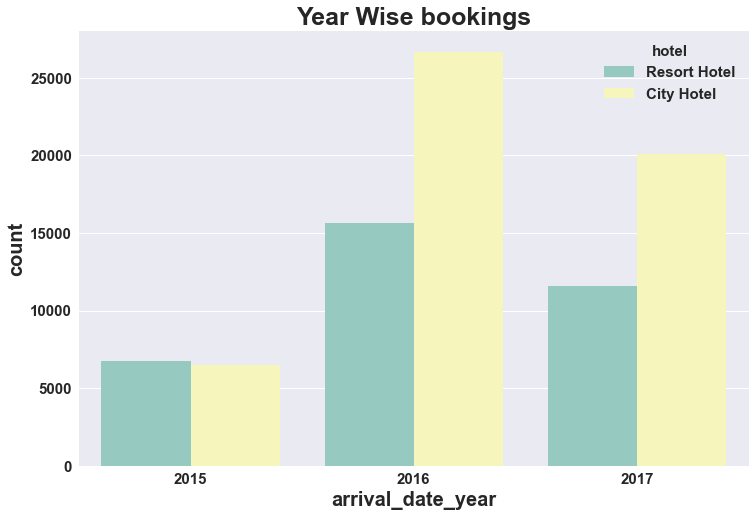

In [27]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'], palette='Set3')
plt.title("Year Wise bookings")

### 2016 had the higest bookings.
### 2015 had less 7000 bookings.
### overall City hotels had the most of the bookings.

# Bivariate and Multivariate Analysis


## 1) Which Hotel type has the highest ADR?


In [28]:
# group by hotel
grup_by_hotel=df1.groupby('hotel')

#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()



#plot the graph

fig = px.bar(df2, x=highest_adr.hotel, y=highest_adr.adr, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="Hotel with highest Avg ADR",
    xaxis_title="Hotel type",
    yaxis_title="ADR",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

## 2) Which hotel type has the more lead time?


In [29]:
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()


#plot Graph

fig = px.bar(df2, x=avg_lead_time.hotel, y=avg_lead_time.lead_time, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="Average Lead Time for each Hotel type",
    xaxis_title="Hotel type",
    yaxis_title="Average Lead time",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

### Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

## 3) Which hotel has highest percentage of booking cancellation?


In [30]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plot Graph

fig = px.bar(df2, x=canceled_df.hotel, y=canceled_df.no_of_cancelled_bookings*100/canceled_df.total_booikngs, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="Percentage of booking cancellation",
    xaxis_title="Hotel type",
    yaxis_title="Percentage(%)",
    legend_title="Percentage of booking cancellation",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

### City Hotel has more booking cancellations then Resort Hotel

## 4)Which hotel has longer waiting time?


In [31]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

#plot Graph

fig = px.bar(df2, x=waiting_time_df.hotel, y=waiting_time_df.days_in_waiting_list, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="Waiting time for each hotel type",
    xaxis_title="Hotel type",
    yaxis_title="Waiting time",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

<Figure size 720x576 with 0 Axes>

### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

## 5) Which Hotels has the most repeated guests?


In [32]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})

#plot Graph

fig = px.bar(df2, x=repeated_guests_df.hotel, y=repeated_guests_df.number_of_repated_guests, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="Most repeated guests for each hotel",
    xaxis_title="Hotel type",
    yaxis_title="No. of repeated guests",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

### Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.


## ADR across the different month.



In [33]:
#groupby
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

arrival_date_month         hotel         adr
8             January    City Hotel   85.269875
9             January  Resort Hotel   49.181693
6            February    City Hotel   89.266427
7            February  Resort Hotel   54.102809
15              March  Resort Hotel   57.590889
14              March    City Hotel   95.193911
0               April    City Hotel  117.314134
1               April  Resort Hotel   79.283805
17                May  Resort Hotel   80.551101
16                May    City Hotel  128.055724
13               June  Resort Hotel  112.380859
12               June    City Hotel  123.996416
11               July  Resort Hotel  156.166914
10               July    City Hotel  120.318314
3              August  Resort Hotel  187.566659
2              August    City Hotel  125.148662
22          September    City Hotel  118.764693
23          September  Resort Hotel  100.892331
20            October    City Hotel  107.585401
21            October  Resort Hotel   63.723065
18           November    City Hotel   89.882912
19           November  Resort Hotel   48.871043
5            December  Resort Hotel   65.488671
4            December    City Hotel   93.204767

In [34]:

fig = px.line(df2, x=bookings_by_months_df.arrival_date_month, y=bookings_by_months_df.adr, color=bookings_by_months_df.hotel )
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="ADR across each month",
    xaxis_title="Month",
    yaxis_title="ADR",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="midnightblue"
    )
)

fig.show()

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

 The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

## 7)Which distribution channel contributed more to adr in order to increase the the income.?


In [56]:
# group by distribution channel and hotel
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# plot graph

fig = px.bar(df2, x=distribution_channel_df.distribution_channel, y=distribution_channel_df.adr,
             color=distribution_channel_df.hotel,
             color_discrete_map = {
                    'City Hotel' : '#9ecae1',
                    'Resort Hotel' : '#007dbf'
             })
#fig.update_traces(marker_color=['#9ecae1'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="ADR across Distribution Channel",
    xaxis_title="Distribution Channel",
    yaxis_title="ADR",
    barmode='group',
    legend_title="Hotels",
    font=dict(
        size=18,
        color="midnightblue"
    )

)

fig.show()

- **Corporate -** These are corporate hotel booing companies which makes bookings possible.  <br>
- **GDS -** A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.  <br>
- **Direct -**  means that bookings are directly made with the respective hotels  <br>
- **TA/TO -** means that booings are made through travel agents or travel operators. <br>
- **Undefined -** Bookings are undefined. may be customers made their bookings on arrival.

## 8) Which distribution channel has the higest cancellation rate?


In [57]:
canceled_df=df1[df1['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

# plot graph

fig = px.bar(df2, x=canceled_df.distribution_channel, y=canceled_df.Counts,
             color=canceled_df.hotel,
             color_discrete_map = {
                    'City Hotel' : '#9ecae1',
                    'Resort Hotel' : '#007dbf'
             })

fig.update_layout(
    title="Cancellation Rate Vs Distribution channel",
    xaxis_title="Distribution channel",
    yaxis_title="Counts",
    barmode='group',
    legend_title="Hotels",
    font=dict(
        size=18,
        color="midnightblue"
    )

)

fig.show()


- In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.
- In "direct" both the hotels has almost same cancellation rate.

## 9)Which Market Segment has the higest cancellation rate?


In [58]:
market_segment_df=df1[df1['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

market_segment         hotel  counts
0        Aviation    City Hotel      45
1   Complementary    City Hotel      54
2   Complementary  Resort Hotel      31
3       Corporate    City Hotel     263
4       Corporate  Resort Hotel     246
5          Direct    City Hotel     912
6          Direct  Resort Hotel     825
7          Groups    City Hotel     887
8          Groups  Resort Hotel     445
9   Offline TA/TO    City Hotel    1257
10  Offline TA/TO  Resort Hotel     800
11      Online TA    City Hotel   12615
12      Online TA  Resort Hotel    5627
13      Undefined    City Hotel       2

In [60]:
fig = px.bar(df2, x=market_segment_df.market_segment, y=market_segment_df.counts,
             color=market_segment_df.hotel,
             color_discrete_map = {
                    'City Hotel' : '#9ecae1',
                    'Resort Hotel' : '#007dbf'
             })

fig.update_layout(
    title="Cancellation Rate Vs Market Segment",
    xaxis_title="Market Segment",
    yaxis_title="Counts",
    barmode='group',
    legend_title="Hotels",
    font=dict(
        size=18,
        color="midnightblue"
    )

)

fig.show()

### Online T/A' has the highest cancellation in both type of cities
### In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

## 10) Does the guests alloted with the same room type which was reserved by them?

In [61]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

In [64]:
# create new column to df1
df1['Same_room_alloted_or_not']=df1.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=df1.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#plot graph

fig = px.bar(DF, x=DF.index, y=DF.percentage, width=600, height=500)
fig.update_traces(marker_color=['#9ecae1','#007dbf'], marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title="%  of not getting the same room vs Booking cancellation",
    xaxis_title="is_canceled",
    yaxis_title="% of not getting same room as per reservation'",
    legend_title="Percentage of booking cancellation",
    font=dict(
        size=18,
        color="midnightblue"
    ),
  
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ['Not canceled', 'canceled']
    )

)

fig.show()

### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


## 11) ADR across different market segment


In [69]:
Grupby=df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()
Grupby = Grupby.sort_values(by='adr',ascending=False)
#plot graph

fig = px.bar(df2, x=Grupby.market_segment, y=Grupby.adr,
             color=Grupby.hotel,
             color_discrete_map = {
                    'City Hotel' : '#9ecae1',
                    'Resort Hotel' : '#007dbf'
             })

fig.update_layout(
    title="Adr across market segment",
    xaxis_title="Market Segment",
    yaxis_title="ADR",
    barmode='group',
    legend_title="Hotels",
    font=dict(
        size=18,
        color="midnightblue"
    )

)

fig.show()

### - 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### - Aviation segment should focus on increasing the bookings of 'City Hotel'

## 12)What is the Optimal stay length in both types of hotels ?


In [74]:
stay = df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'number_of_stays'})    # rename the columns

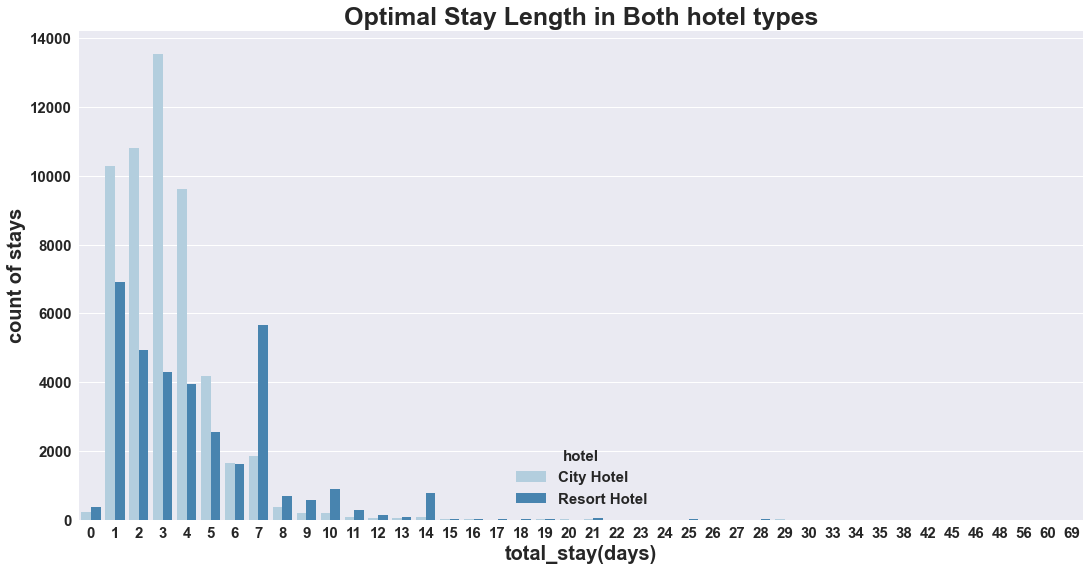

In [96]:

# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='number_of_stays',hue='hotel',data=stay, palette='Blues')

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')
plt.show()

### Optimal stay in both the type hotel is less than 7 days.

## 13)Relationship between ADR and total stay.


In [99]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = df1.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'number_of_stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

total_stay     adr         hotel
0               0    0.00    City Hotel
1               0    0.00  Resort Hotel
2               1    0.00    City Hotel
3               1    0.00  Resort Hotel
4               1    1.00    City Hotel
...           ...     ...           ...
17995           7  212.06    City Hotel
17996           7  212.10  Resort Hotel
17997           7  212.14  Resort Hotel
17998           7  212.29    City Hotel
17999           7  212.29  Resort Hotel

[18000 rows x 3 columns]

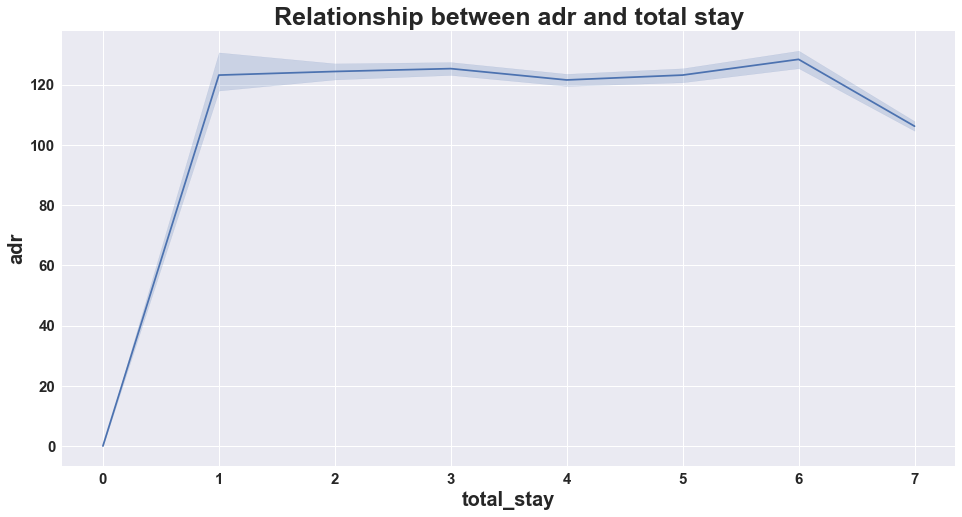

In [102]:

#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')
plt.show()

### As the total stay increases the adr also increases.



## 14) Relationship between the repeated guests and previous bookings not canceled.?


In [103]:
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]

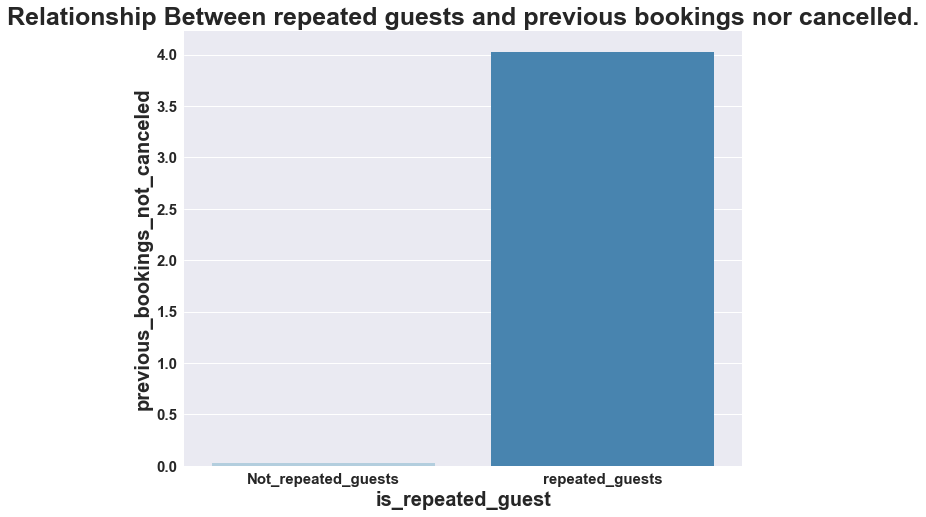

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'], ci=None, palette="Blues")
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

### Not Repeated guests are more likely to cancel their bookings.


## 15) Relationship between  adr and total stay

In [105]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)


Text(0.5, 1.0, 'Relationship between  adr and total stay')

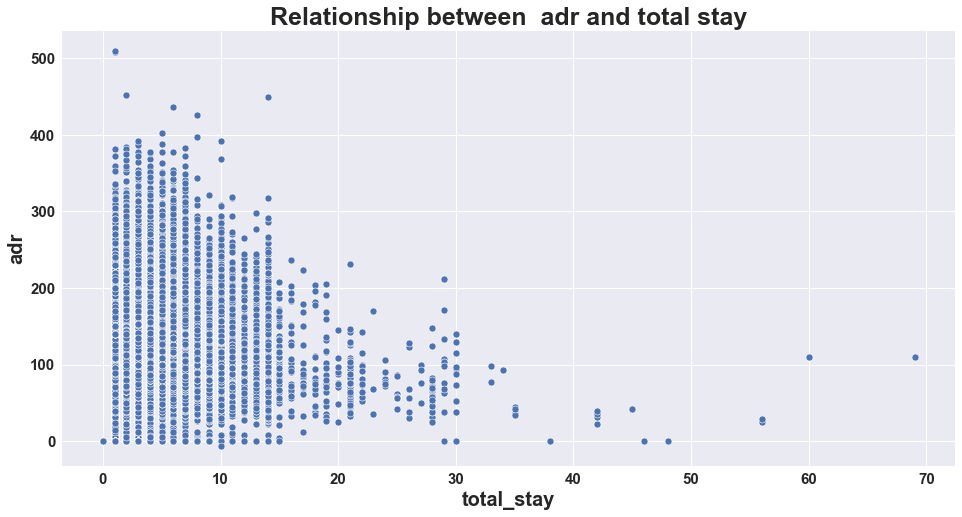

In [106]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'], palette='Blues')
plt.title('Relationship between  adr and total stay')

### The stay increases adr is decreasing. Thus for longer stays customer can get good adr.

## 16) ADR relationship with total number of people


Text(0.5, 1.0, 'ADR v/s Total Number of people')

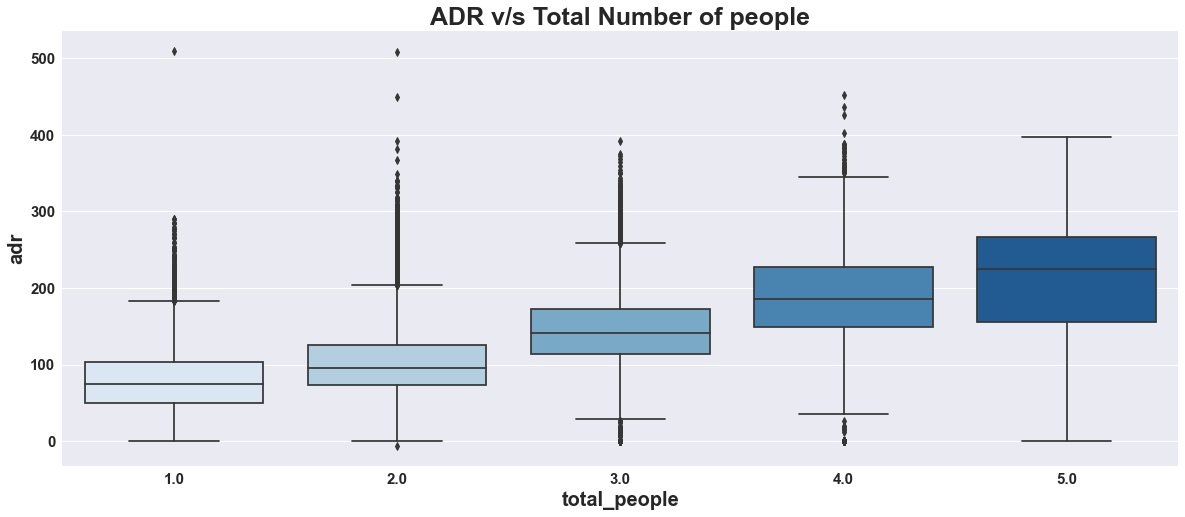

In [107]:
plt.figure(figsize=(20,8))
df2=df1[df1['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'], palette='Blues')

# set lables
plt.title('ADR v/s Total Number of people')

### As the total number of people increases adr also increases.
### Thus adr and total people are directly proportional to each other.

## Correlation of the columns


Text(0.5, 1.0, 'Co-relation of the columns')

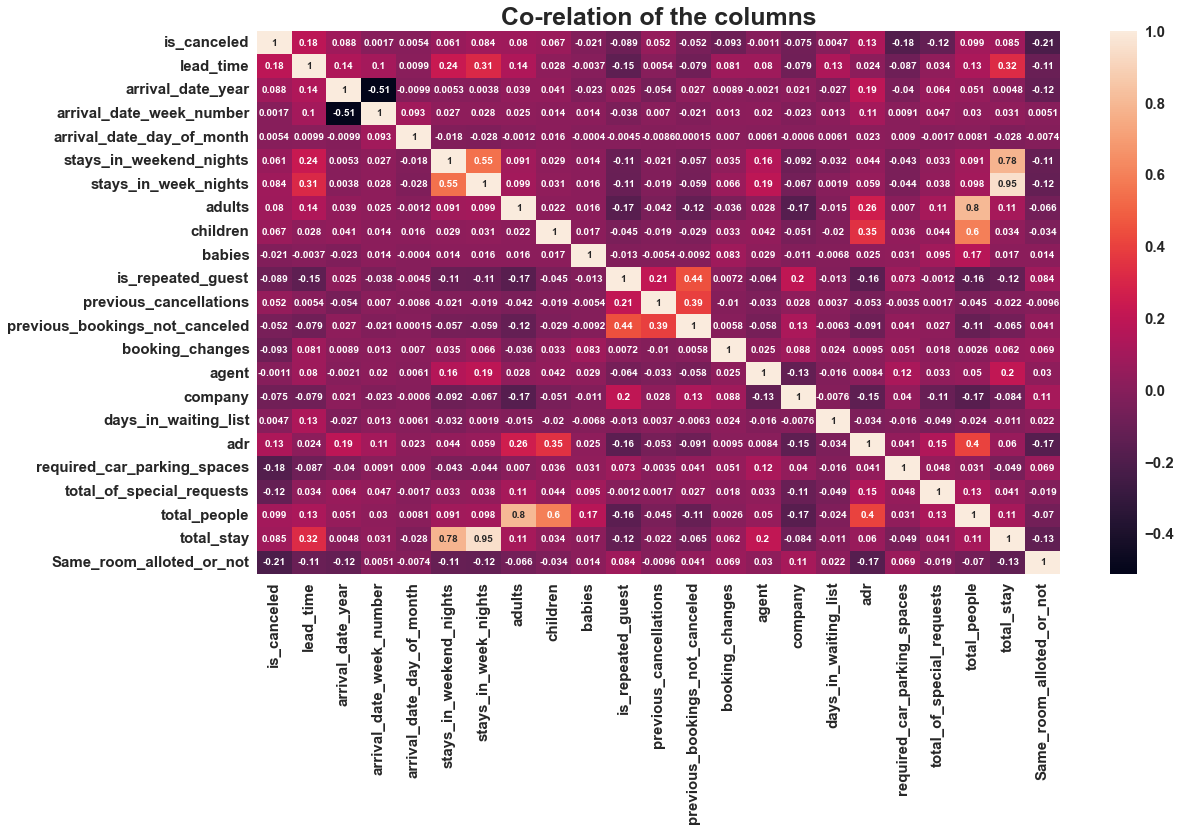

In [108]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns')

-  is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
-  lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
-  adults,childrens and babies are corelated to each other. That means more the people more will be adr.
-  is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

## Conclusions:

- City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
- 27.5 % bookings were got cancelled out of all the bookings.
- Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
- The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.
- Most of the customers (91.6%) do not require car parking spaces.
- 79.1 % bookings were made through TA/TO (travel agents/Tour operators).
- BB( Bed & Breakfast) is the most preferred type of meal by the guests.
- Maximum number of guests were from Portugal, i.e. more than 25000 guests.
- Most of the bookings for City hotels and Resort hotel were happened in 2016.
- Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
- Booking cancellation rate is high for City hotels which almost 30 %.
- Average lead time for resort hotel is high.
- Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
- Resort hotels have the most repeated guests.
- Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
- Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.